# Import Libraries

In [1]:
#!pip install pyro-ppl

In [2]:
import pyro
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import pyro.distributions as distrib
import warnings

warnings.filterwarnings('ignore')

# Initialize Distributions



Normal(loc: 0.5, scale: 1.0)


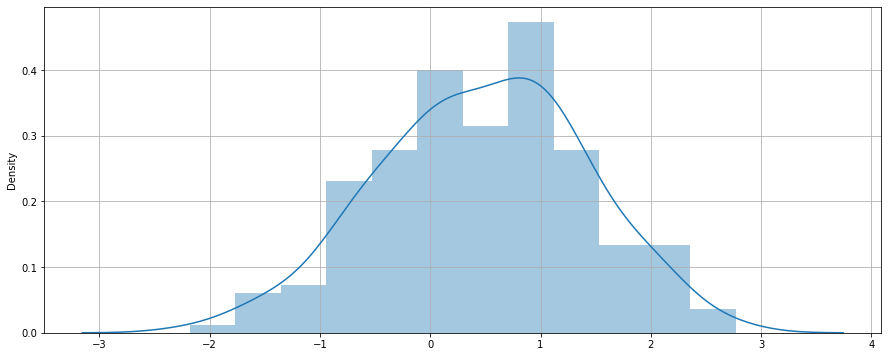



Laplace(loc: 0.8999999761581421, scale: 0.10000000149011612)


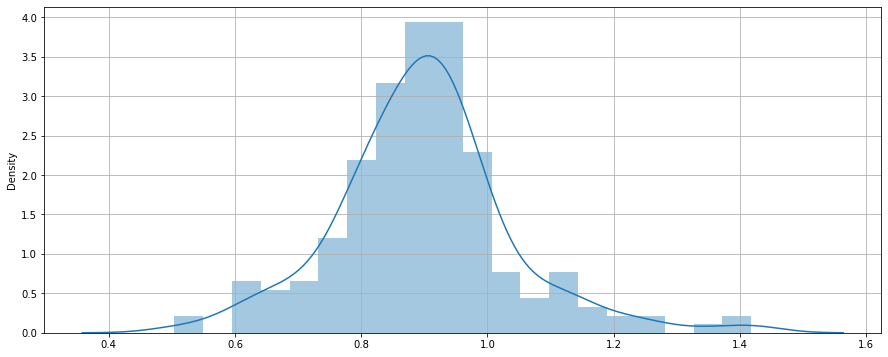



LogNormal()


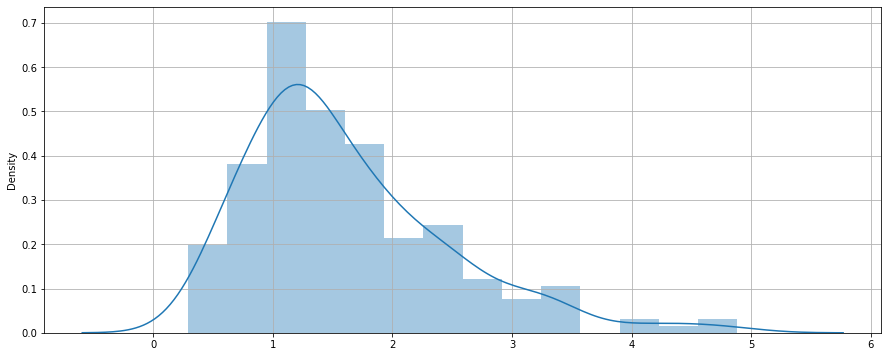



Binomial(total_count: 1.0, probs: 0.30000001192092896)


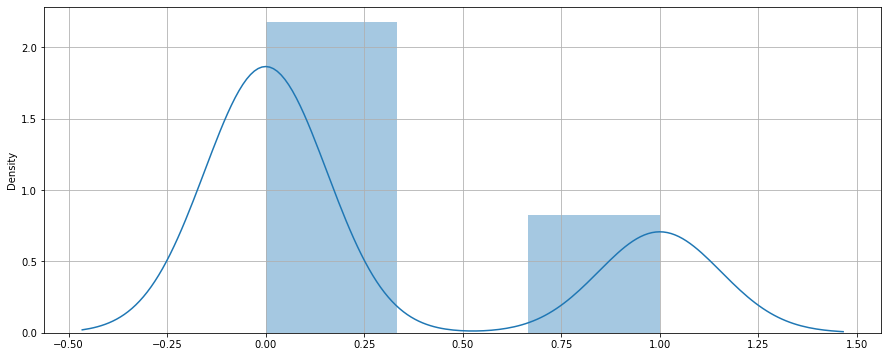



Geometric(probs: 0.4000000059604645)


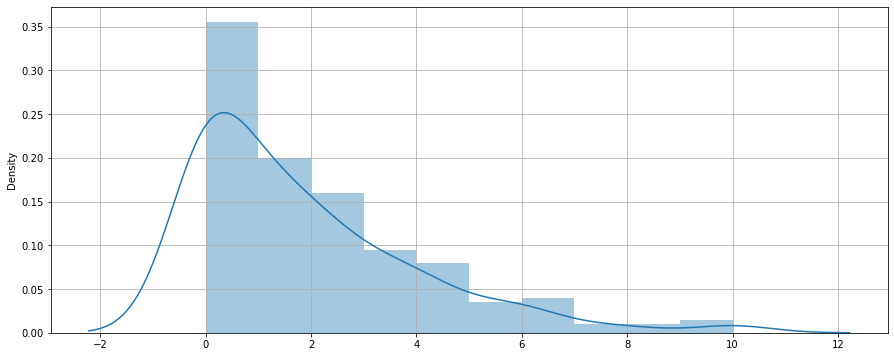



Bernoulli(probs: 0.4000000059604645)


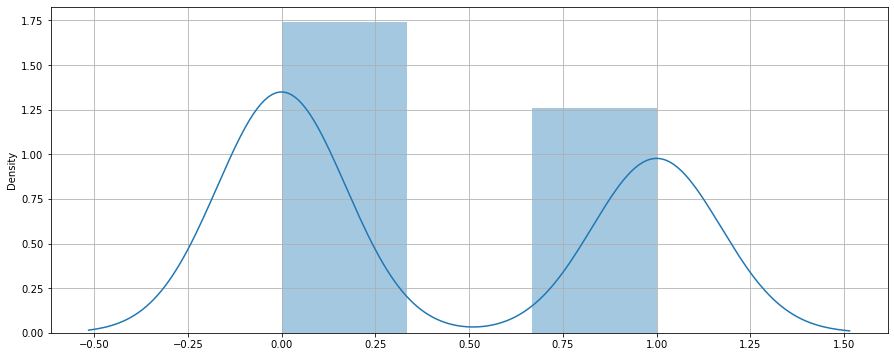



Poisson(rate: 0.6000000238418579)


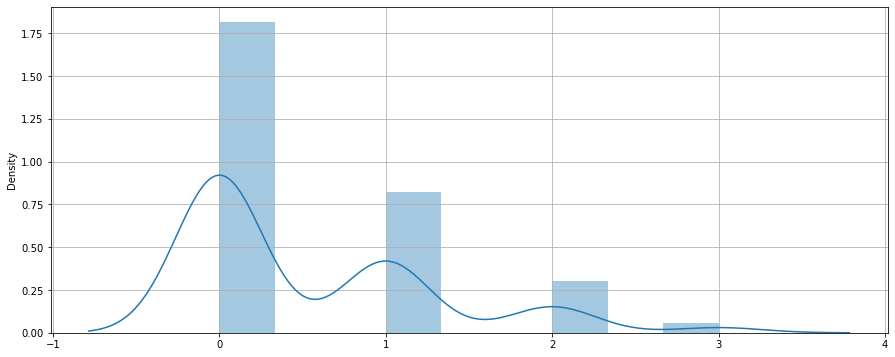



Exponential(rate: 0.20000000298023224)


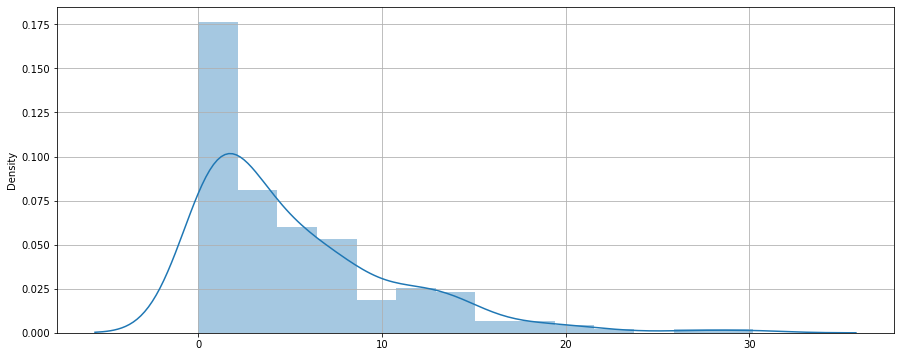



Gamma(concentration: 0.10000000149011612, rate: 0.699999988079071)


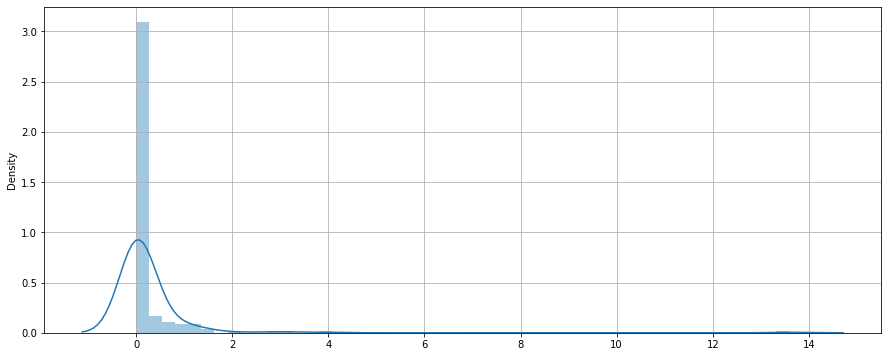



Beta()


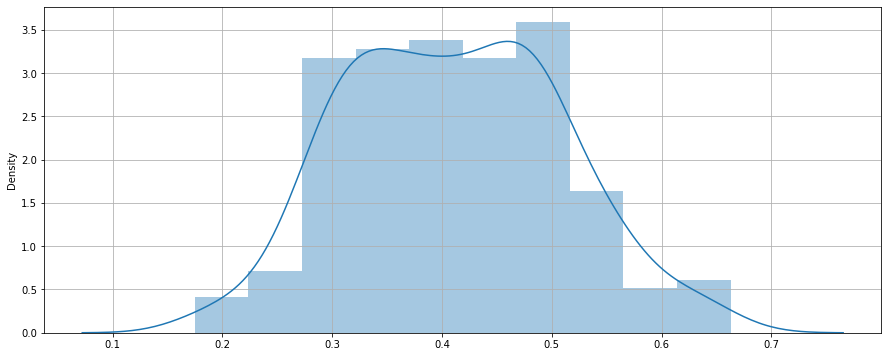



Uniform(low: 3.0, high: 7.0)


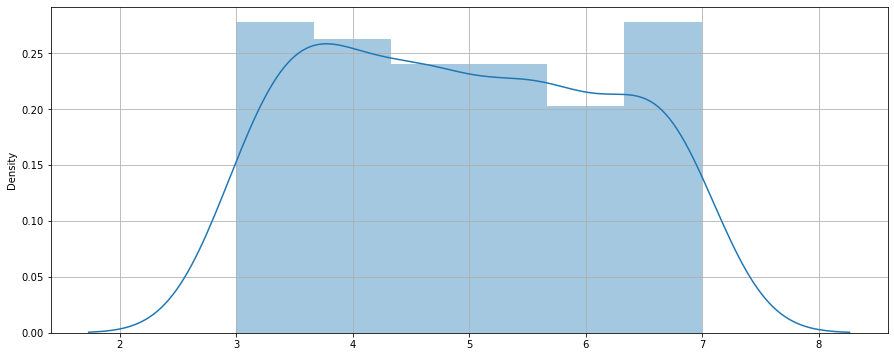

In [3]:
distributions = [
           distrib.Normal(loc=0.5, scale=1),#gaussian distribution
           distrib.Laplace(loc=0.9, scale=0.1),
           distrib.LogNormal(loc=0.4, scale=0.5),
           
           distrib.Binomial(probs=0.3),
           distrib.Geometric(probs=0.4),
           distrib.Bernoulli(probs=0.4),

           distrib.Poisson(rate=0.6),
           distrib.Exponential(rate=0.2),

           distrib.Gamma(concentration=0.1, rate=0.7),
           distrib.Beta(concentration1=10, concentration0=15),

           distrib.Uniform(low=3, high=7)
           ]
for i in distributions:
    vals = []
    print('\n\n', i, sep='')
    for j in range (200):
        vals.append(pyro.sample("sample_name", i))
    plt.figure(figsize=(15,6))
    plt.grid()
    sns.distplot(vals);
    plt.show();

# Weather Model

In [4]:
def weather():
    cloudy = pyro.sample("cloudy", distrib.Bernoulli(probs=torch.rand(1)))#0 or 1
    mean = {"cloudy":30, "not_cloudy":50}
    std = {"cloudy":10.4, "not_cloudy":25.5}
    
    if(cloudy >0.5):
        actual = "cloudy"
    else:
        actual="not_cloudy"
        
    return actual, pyro.sample("normal distribution", distrib.Normal(mean[actual], std[actual]))

In [5]:
cloudy_vals = []
not_cloudy_vals = []

for i in range(100):
    temp = weather()
    if(temp[0]=='cloudy'):
        cloudy_vals.append(temp[1])
    else:
        not_cloudy_vals.append(temp[1])

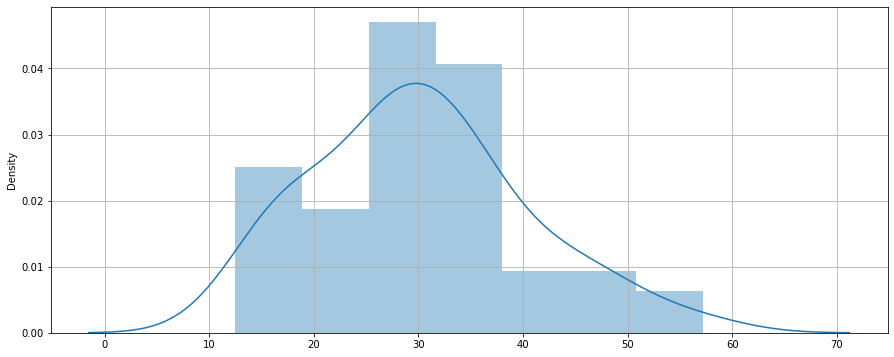

In [6]:
plt.figure(figsize=(15,6))
plt.grid()
sns.distplot(cloudy_vals);
plt.show();

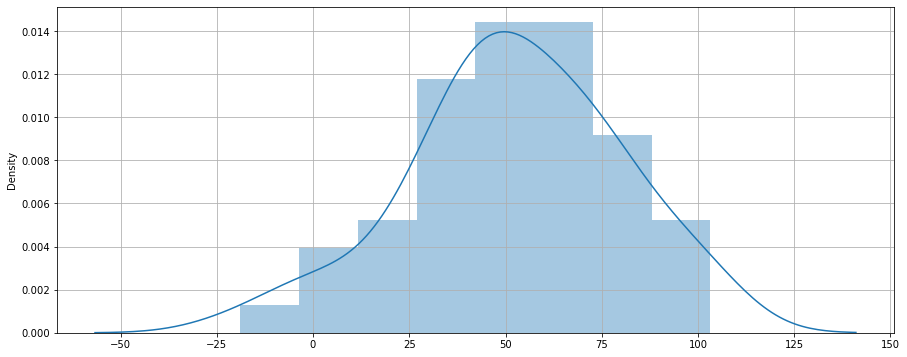

In [7]:
plt.figure(figsize=(15,6))
plt.grid()
sns.distplot(not_cloudy_vals);
plt.show();